In [ ]:
!pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.9 MB/s eta 0:00:00
INFO: pip is looking at 

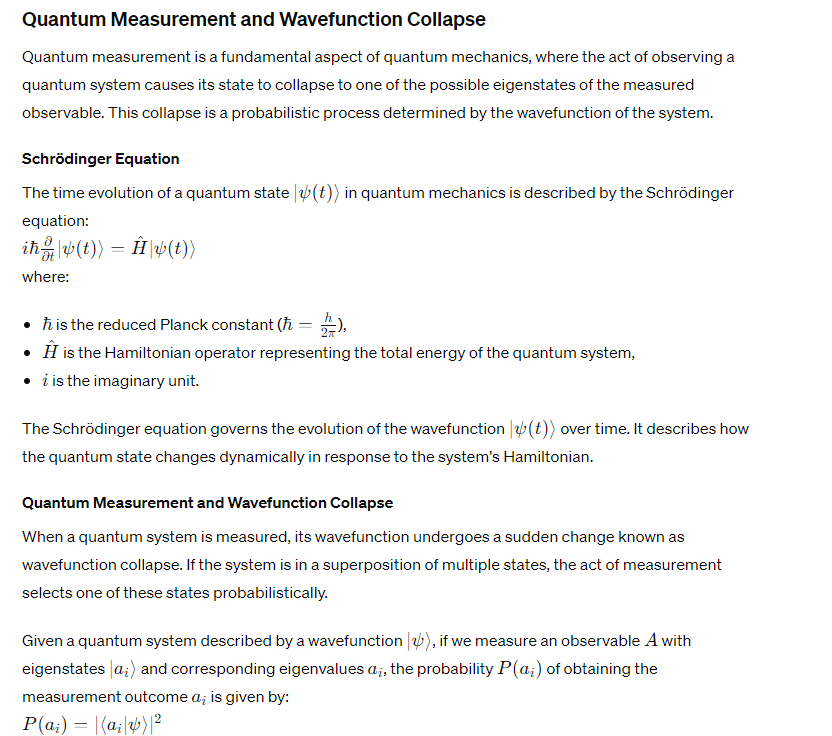

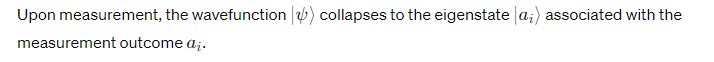

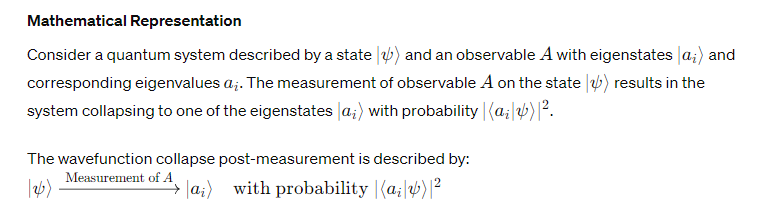

In [ ]:
import cirq

# Define the qubit
qubit = cirq.GridQubit(0, 0)

# Create a quantum circuit
circuit = cirq.Circuit()

# Hadamard gate to create superposition
circuit.append(cirq.H(qubit))

# Measurement
circuit.append(cirq.measure(qubit, key='result'))

# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1)

# Display the measurement result
print("Measurement result:", result.data['result'])

# Display the final state of the qubit
final_state = simulator.simulate(circuit)
print("Final state vector of the qubit:")
print(final_state.final_state_vector)

Measurement result: 0    1
Name: result, dtype: int64
Final state vector of the qubit:
[0.        +0.j 0.99999994+0.j]


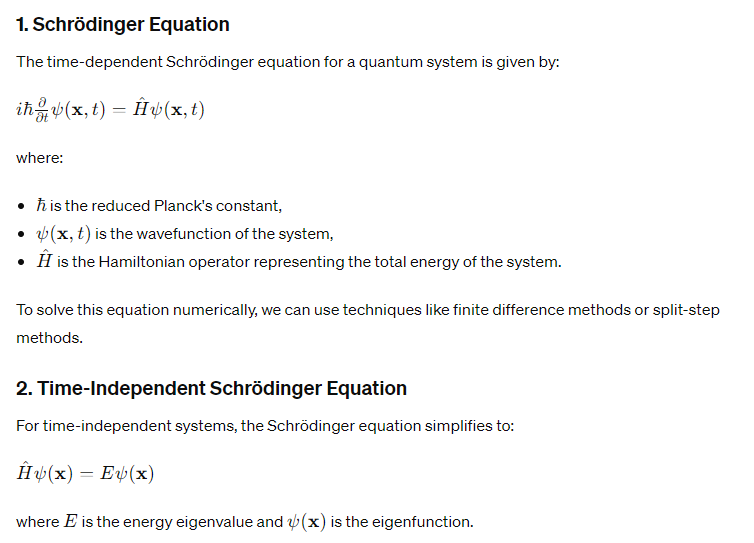

Time-Independent Schrödinger Equation


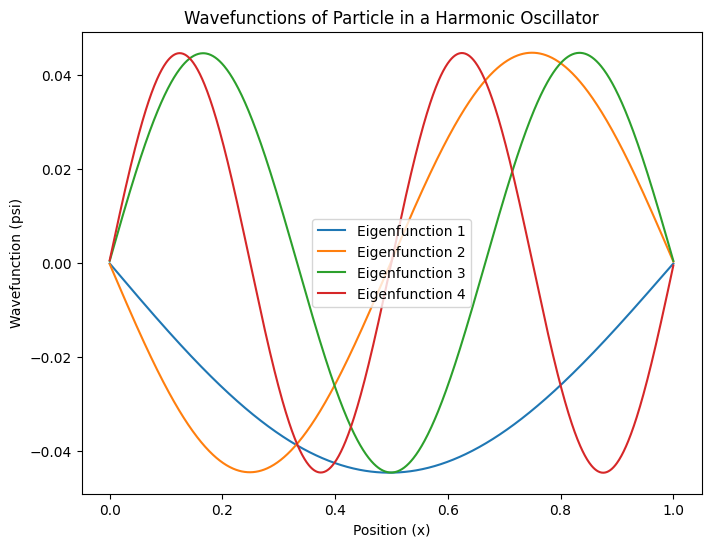

Eigenvalues (Energy levels):
Eigenvalue 1: 5.065785248963371
Eigenvalue 2: 19.860355041540117
Eigenvalue 3: 44.48830672987887
Eigenvalue 4: 78.96342989597268


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants and parameters
hbar = 1.0  # Reduced Planck's constant
m = 1.0     # Particle mass
L = 1.0     # Length of the potential well
N = 1000    # Number of spatial grid points
dx = L / N  # Spatial grid spacing

# Spatial grid
x = np.linspace(0, L, N)

# Kinetic energy operator (second derivative)
T = (-hbar**2 / (2 * m)) * (np.diag(-2 * np.ones(N)) + np.diag(np.ones(N-1), k=1) + np.diag(np.ones(N-1), k=-1)) / dx**2

# Potential energy operator (e.g., harmonic oscillator)
V = 0.5 * m * np.diag(x**2)

# Hamiltonian matrix
H = T + V

# Solve for eigenvalues and eigenvectors
E, psi = np.linalg.eigh(H)

# Plot the first few eigenfunctions
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.plot(x, psi[:, i], label=f"Eigenfunction {i+1}")

plt.title("Wavefunctions of Particle in a Harmonic Oscillator")
plt.xlabel("Position (x)")
plt.ylabel("Wavefunction (psi)")
plt.legend()
plt.show()

# Print the corresponding eigenvalues
print("Eigenvalues (Energy levels):")
for i in range(4):
    print(f"Eigenvalue {i+1}: {E[i]}")

Time-Dependent Schrödinger Equation


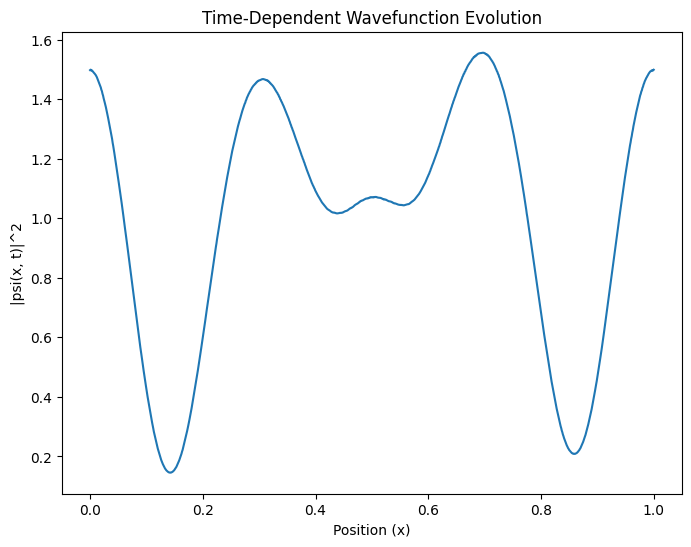

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters and constants
hbar = 1.0  # Reduced Planck's constant
m = 1.0     # Particle mass
L = 1.0     # Length of the potential well
N = 1000    # Number of spatial grid points
dx = L / N  # Spatial grid spacing
dt = 0.001  # Time step
t_max = 1.0 # Maximum simulation time

# Spatial grid
x = np.linspace(0, L, N)

# Initial wavefunction (Gaussian wave packet)
x0 = L / 2
sigma = 0.1
psi0 = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * 0.0)

# Potential function (e.g., harmonic oscillator)
V = 0.5 * m * x**2

# Time evolution using split-step Fourier method
t = 0.0
while t < t_max:
    # Kinetic energy operator in momentum space
    k = np.fft.fftfreq(N, d=dx) * 2 * np.pi
    T_hat = np.exp(-1j * hbar * k**2 / (2 * m) * dt)

    # Potential operator in position space
    V_hat = np.exp(-1j * V * dt / hbar)

    # Perform time evolution using split-step method
    psi0 = np.fft.ifft(T_hat * np.fft.fft(V_hat * psi0))

    # Normalize wavefunction (optional)
    psi0 /= np.sqrt(np.sum(np.abs(psi0)**2) * dx)

    # Increment time
    t += dt

# Plot the evolved wavefunction
plt.figure(figsize=(8, 6))
plt.plot(x, np.abs(psi0)**2)
plt.title("Time-Dependent Wavefunction Evolution")
plt.xlabel("Position (x)")
plt.ylabel("|psi(x, t)|^2")
plt.show()

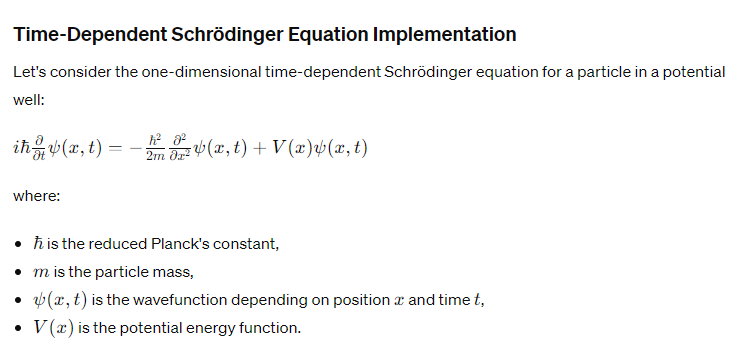

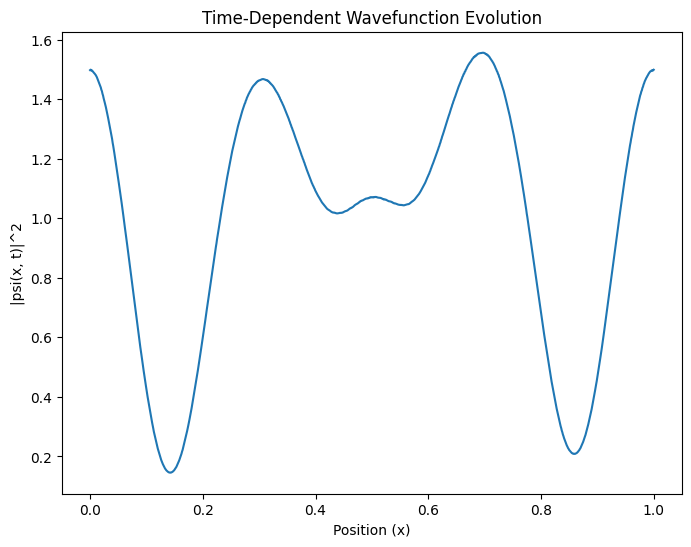

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters and constants
hbar = 1.0  # Reduced Planck's constant
m = 1.0     # Particle mass
L = 1.0     # Length of the potential well
N = 1000    # Number of spatial grid points
dx = L / N  # Spatial grid spacing
dt = 0.001  # Time step
t_max = 1.0 # Maximum simulation time

# Spatial grid
x = np.linspace(0, L, N)

# Initial wavefunction (Gaussian wave packet)
x0 = L / 2
sigma = 0.1
psi0 = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * 0.0)

# Potential function (e.g., harmonic oscillator)
V = 0.5 * m * x**2

# Time evolution using split-step Fourier method
t = 0.0
while t < t_max:
    # Kinetic energy operator in momentum space
    k = np.fft.fftfreq(N, d=dx) * 2 * np.pi
    T_hat = np.exp(-1j * hbar * k**2 / (2 * m) * dt)

    # Potential operator in position space
    V_hat = np.exp(-1j * V * dt / hbar)

    # Perform time evolution using split-step method
    psi0 = np.fft.ifft(T_hat * np.fft.fft(V_hat * psi0))

    # Normalize wavefunction (optional)
    psi0 /= np.sqrt(np.sum(np.abs(psi0)**2) * dx)

    # Increment time
    t += dt

# Plot the evolved wavefunction
plt.figure(figsize=(8, 6))
plt.plot(x, np.abs(psi0)**2)
plt.title("Time-Dependent Wavefunction Evolution")
plt.xlabel("Position (x)")
plt.ylabel("|psi(x, t)|^2")
plt.show()

In [ ]:
!pip install qiskit qiskit-ibm-runtime qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 37.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 8.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Prepari

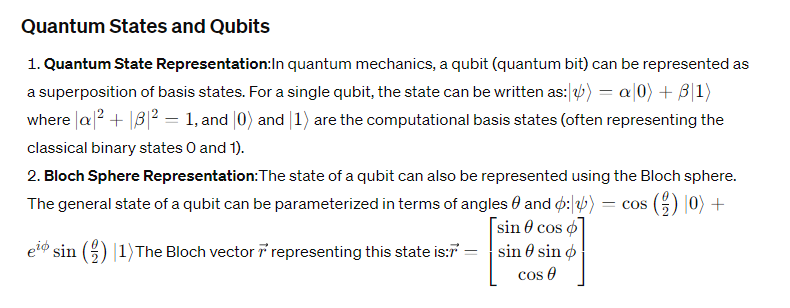

In [ ]:
import cirq

# Define the quantum circuit
def quantum_state_representation():
    # Create a qubit
    qubit = cirq.LineQubit(0)

    # Define the circuit
    circuit = cirq.Circuit()

    # Apply Hadamard gate (H) to put qubit in superposition
    circuit.append(cirq.H(qubit))

    # Print the circuit
    print("Quantum Circuit for Superposition:")
    print(circuit)

    # Simulate the circuit
    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)

    # Print the state vector
    print("\nState Vector:")
    print(result.final_state_vector)

# Call the function to demonstrate quantum state representation
quantum_state_representation()

Quantum Circuit for Superposition:
0: ───H───

State Vector:
[0.70710677+0.j 0.70710677+0.j]


In [ ]:
import cirq
import numpy as np

# Define the quantum circuit
def bloch_sphere_representation():
    # Create a qubit
    qubit = cirq.LineQubit(0)

    # Define the circuit
    circuit = cirq.Circuit()

    # Apply rotations to represent a state on the Bloch sphere
    theta = np.pi / 3  # Angle for Bloch sphere representation (example angle)
    phi = np.pi / 4    # Angle for Bloch sphere representation (example angle)

    # Apply rotation gates around X and Y axes
    circuit.append(cirq.rx(theta).on(qubit))
    circuit.append(cirq.ry(phi).on(qubit))

    # Print the circuit
    print("Quantum Circuit for Bloch Sphere Representation:")
    print(circuit)

    # Simulate the circuit
    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)

    # Extract the Bloch vector components
    qubit_index = 0  # Change the variable name to avoid overwriting the 'index' argument
    bloch_vector = cirq.bloch_vector_from_state_vector(result.final_state_vector, qubit_index)

    # Print the Bloch vector components
    print("\nBloch Vector (x, y, z):")
    print(bloch_vector)

# Call the function to demonstrate Bloch sphere representation
bloch_sphere_representation()

Quantum Circuit for Bloch Sphere Representation:
0: ───Rx(0.333π)───Ry(0.25π)───

Bloch Vector (x, y, z):
[ 0.35355335 -0.8660253   0.3535534 ]


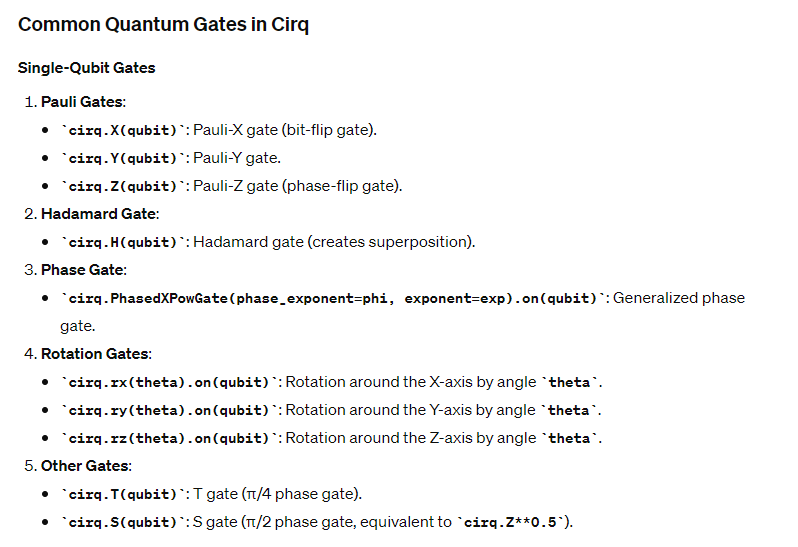

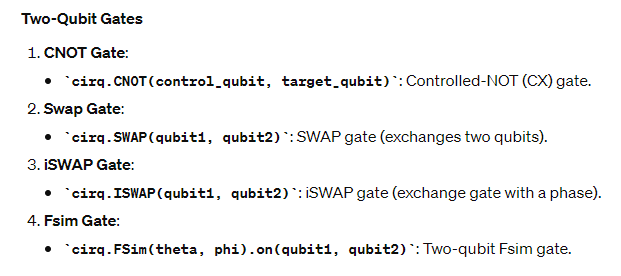

In [ ]:
import cirq

def apply_quantum_operations():
    # Create qubits
    qubit1 = cirq.LineQubit(0)
    qubit2 = cirq.LineQubit(1)

    # Create a quantum circuit
    circuit = cirq.Circuit()

    # Apply single-qubit gates
    circuit.append(cirq.X(qubit1))  # Pauli-X gate
    circuit.append(cirq.Y(qubit1))  # Pauli-Y gate
    circuit.append(cirq.Z(qubit1))  # Pauli-Z gate
    circuit.append(cirq.H(qubit1))  # Hadamard gate
    circuit.append(cirq.rx(0.5).on(qubit1))  # X-axis rotation gate

    # Apply two-qubit gates
    circuit.append(cirq.CNOT(qubit1, qubit2))  # CNOT gate
    circuit.append(cirq.SWAP(qubit1, qubit2))  # SWAP gate
    circuit.append(cirq.ISWAP(qubit1, qubit2))  # iSWAP gate

    # Display the circuit
    print("Quantum Circuit with Various Gates:")
    print(circuit)

    # Simulate the circuit
    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)

    # Print the final state vector
    print("\nFinal State Vector:")
    print(result.final_state_vector)

# Call the function to apply quantum operations
apply_quantum_operations()

Quantum Circuit with Various Gates:
0: ───X───Y───Z───H───Rx(0.159π)───@───×───iSwap───
                                   │   │   │
1: ────────────────────────────────X───×───iSwap───

Final State Vector:
[-0.17494102-0.6851245j  0.        +0.j         0.        +0.j
 -0.17494102-0.6851245j]


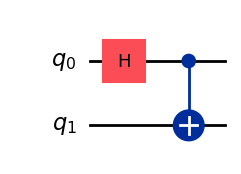

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

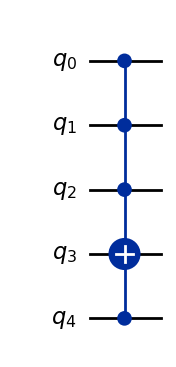

In [ ]:
from qiskit.circuit.library import MCXGate
gate = MCXGate(4)

from qiskit import QuantumCircuit
circuit = QuantumCircuit(5)
circuit.append(gate, [0, 1, 4, 2, 3])
circuit.draw('mpl')

#Construct circuits
Source: https://docs.quantum.ibm.com/build/circuit-construction

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(5)
qc.qubits

[Qubit(QuantumRegister(5, 'q'), 0),
 Qubit(QuantumRegister(5, 'q'), 1),
 Qubit(QuantumRegister(5, 'q'), 2),
 Qubit(QuantumRegister(5, 'q'), 3),
 Qubit(QuantumRegister(5, 'q'), 4)]

In [ ]:
qc.x(0)  # Add X-gate to qubit 0
qc.data

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0),), clbits=())]

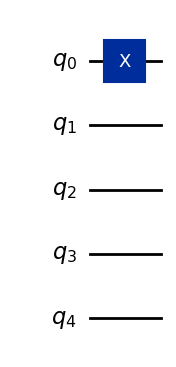

In [ ]:
qc.draw("mpl")

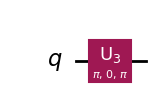

In [ ]:
# Draw definition circuit of 0th instruction in `qc`
qc.data[0].operation.definition.draw("mpl")

#Build circuits


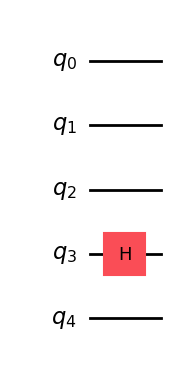

In [ ]:
from qiskit.circuit.library import HGate

qc = QuantumCircuit(5)
qc.append(
    HGate(),  # New HGate instruction
    [3],       # Apply to qubit 0
)
qc.draw("mpl")

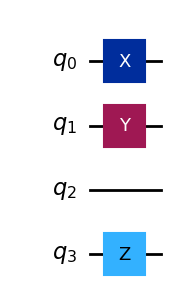

In [ ]:
qc_a = QuantumCircuit(4)
qc_a.x(0)

qc_b = QuantumCircuit(2, name="qc_b")
qc_b.y(0)
qc_b.z(1)

# compose qubits (0, 1) of qc_a to qubits (1, 3) of qc_b respectively
combined = qc_a.compose(qc_b, qubits=[1, 3])
combined.draw("mpl")